<a href="https://colab.research.google.com/github/dmirandam/AlgorithmsUN2022II/blob/main/dmirandam_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -U fortran-magic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00', 
                             '2017-01-07 00:00:00+00:00', 
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

The fortranmagic extension is already loaded. To reload it, use:
  %reload_ext fortranmagic


<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [ ]:
assert ran_the_first_cell, "Oh noes!"

In [ ]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [ ]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [ ]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [ ]:
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [ ]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [ ]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [ ]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [ ]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [ ]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [ ]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [ ]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}

In [ ]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'David': 'Hume',
 'Immanuel': 'Kant',
 'Bertrand': 'Russell',
 'Ludwig': 'Wittgenstein'}

In [ ]:
del philosophers['David']
philosophers

{'Immanuel': 'Kant', 'Bertrand': 'Russell', 'Ludwig': 'Wittgenstein'}

In [ ]:
# No slicing.
philosophers['Bertrand':'Immanuel']

TypeError: ignored

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [ ]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [ ]:
%%time

matmul(a, b)

CPU times: user 37 µs, sys: 1 µs, total: 38 µs
Wall time: 46.3 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

**My own example 1 - Changing in matmul(A, B) Python len(B) (# of rows of B) for len(A[0]) (# of columns of A)**

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
    return out

**My own example 2 - Verifiying error with in matmul(A, B) Python with the original matrices when changing len(B) (# of rows of B) for len(A[0]) (# of colums of A)**

In [ ]:
matmul(a,b)

IndexError: ignored

**My own example 3 - Chekcing the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
def matmul(A, B):
    if len(A[0]) != len(B):
      print("Columns of A different from rows of B")
      return

    
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
    return out


**My own example 4 -  Verifiying error with in matmul(A, B) Python when checking the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
matmul(a,b)

**My own example 5 - Deifining A and B that are compatiible for multiplcation**

In [ ]:
A=[[8,7,6],[8,7,5],[4,23,3],[2,34,4]]
B=[[1,2,3,4],[5,6,2,3],[1,4,4,3]]


**My own example 6 - Runinng the correct Python matrix multiplication code with the matrices with dimensions compatible for multiplication.**

In [ ]:
matmul(A,B)

In [ ]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

**My own example 7 - Running 10 times matmul(randa, randb) with randa and randb a randon matrices of 600 x 100 and 100 x 600 and calulating the average execution time**

In [ ]:
import time
randa = random_matrix(600,100)
randb = random_matrix(100,600)
mean= 0
for i in range(10):
  start_time = time.time()
  matmul(randa,randb)
  v = time.time() - start_time
  mean= mean+v

mean=mean/10


**My own example 8 - Creating the average execution time data frame and adding Python's average execution time**

In [ ]:
import pandas as pd
averagex= pd.DataFrame(columns = ["Lenguaje", "Tiempo de ejecucion"]) ##creacion de dataframe vacio
tmp = pd.DataFrame({"Lenguaje":["Python"],"Tiempo de ejecucion":[mean]}) ##aqui se crea un nuevo dataframe temporal
##se usa para meterle los datos obtenidos y luego concatenar ambos dataframes
averagex = pd.concat([averagex,tmp])#se concatenan los dataframes
averagex

,Lenguaje,Tiempo de ejecucion
0,Python,8.378232


**My own example 9 - Running 10 times randa and randb mutiplicaction as NumPy arrays  adding NumPy's average execution time**

In [ ]:

meanp= 0
randa = random_matrix(600,100)
randb = random_matrix(100,600)
for i in range(len(randa)):
  randa[i] =np.array(randa[i])
for j in range(len(randb)):
  randb[j] =np.array(randb[j]) 

for i in range(10):
  start_time = time.time()
  np.dot(randa,randb)
  v = time.time() - start_time
  meanp= meanp+v

meanp=meanp/10


In [ ]:
tmp = pd.DataFrame({"Lenguaje":["Numpy"],"Tiempo de ejecucion":[meanp]})
##de ahi en adelante es crear un nuevo dataframe por cada dato y luego concatenarlo al anterior
averagex = pd.concat([averagex,tmp], ignore_index=True)
averagex

,Lenguaje,Tiempo de ejecucion
0,Python,8.378232
1,Numpy,0.003601


In [ ]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [ ]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs * ys)
end

In [ ]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [ ]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 11.3 ms, sys: 0 ns, total: 11.3 ms
Wall time: 11.5 ms


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 221 µs, sys: 0 ns, total: 221 µs
Wall time: 258 µs


333328333350000.0

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


**My own example 10 - Deifining A (2x2)  and B (2x2)**

In [ ]:
A=[[1,2],
   [3,4]]
B= [[5,6],
    [7,8]]

**My own example 11 - Defining Fortran subroutine matmul(A,B) for 2x2 matrices**

In [ ]:
%%fortran


subroutine matmul(A,B,N,L,M,R)
  implicit none
  integer,intent(in) :: N,L,M
  double precision, intent(in) :: A(2,2)
  double precision, intent(in) :: B(2,2)
  double precision, intent(out) :: R(N,M)
  integer I,J,K,aux
  do I=1,N
    do J=1,M
      R(I,J)=0
      do K=1,L
        R(I,J) = R(I,J) + A(I,K)*B(K,J)

      end do
    end do
  end do
end

**My own example 12 -Run Fortran subroutine matmul(A,B) with a and b 2x2 matrices**

In [ ]:
N=len(A)
L=len(A[0])
M=len(B[0])
matmul(A,B,N,L,M)

array([[19., 22.],
       [43., 50.]])

**My own example 13 - Defining Fortran subroutine matmul(A,B) for 600x100 and 100x600 matrices**

In [ ]:
%%fortran


subroutine matmul(A,B,N,L,M,R)
  implicit none
  integer,intent(in) :: N,L,M
  double precision, intent(in) :: A(600,*)
  double precision, intent(in) :: B(100,*)
  double precision, intent(out) :: R(N,M)
  integer I,J,K,aux
  do I=1,N
    do J=1,M
      R(I,J)=0
      do K=1,L
        R(I,J) = R(I,J) + A(I,K)*B(K,J)

      end do
    end do
  end do
end

**My own example 14 -Run Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices**

In [ ]:
randa = random_matrix(600,100)
randb = random_matrix(100,600)
for i in range(len(randa)):
  randa[i] =np.array(randa[i])
for j in range(len(randb)):
  randb[j] =np.array(randb[j]) 

N=len(randa)
L=len(randa[0])
M=len(randb[0])
matmul(randa,randb,N,L,M)

array([[24.94944353, 26.03997525, 28.27658511, ..., 22.53369441,
        23.50880773, 29.40714832],
       [25.65625808, 25.7762298 , 29.20713759, ..., 22.25762603,
        21.60865407, 27.98525791],
       [26.21771387, 28.97638522, 30.52284134, ..., 24.04053394,
        24.05286632, 28.52250656],
       ...,
       [26.56662185, 27.40254411, 31.44627447, ..., 23.20183425,
        22.23369862, 31.54777917],
       [23.78731655, 26.48003242, 28.19327831, ..., 22.23410128,
        23.51037709, 27.03829508],
       [28.46013568, 28.19506641, 28.47922606, ..., 25.20390207,
        27.23962689, 29.30805933]])

**My own example 15 - Running 10 times the  Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices and adding Fortran magic average execution time to the data frame**

In [ ]:
randa = random_matrix(600,100)
randb = random_matrix(100,600)
for i in range(len(randa)):
  randa[i] =np.array(randa[i])
for j in range(len(randb)):
  randb[j] =np.array(randb[j]) 

N=len(randa)
L=len(randa[0])
M=len(randb[0])


for i in range(10):
  start_time = time.time()
  matmul(randa,randb,N,L,M)
  v = time.time() - start_time
  meanp= meanp+v

meanp=meanp/10

tmp = pd.DataFrame({"Lenguaje":["Fortran magic"],"Tiempo de ejecucion":[meanp]})
##de ahi en adelante es crear un nuevo dataframe por cada dato y luego concatenarlo al anterior
averagex = pd.concat([averagex,tmp], ignore_index=True)
averagex

,Lenguaje,Tiempo de ejecucion
0,Python,8.378232
1,Numpy,0.003601
2,Fortran magic,0.043312


**My own example 16 - Creating a  Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%fortran


subroutine matmul(A,B,N,L,M,R)
  implicit none
  integer,intent(in) :: N,L,M
  double precision, intent(in) :: A(600,*)
  double precision, intent(in) :: B(100,*)
  double precision, intent(out) :: R(N,M)
  integer I,X,J,K,aux
  do X=0, 10
    do I=1,N
      do J=1,M
        R(I,J)=0
        do K=1,L
          R(I,J) = R(I,J) + A(I,K)*B(K,J)

        end do
      end do
    end do
  end do
end

**My own example 17 - Running the Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
randa = random_matrix(600,100)
randb = random_matrix(100,600)
for i in range(len(randa)):
  randa[i] =np.array(randa[i])
for j in range(len(randb)):
  randb[j] =np.array(randb[j]) 

N=len(randa)
L=len(randa[0])
M=len(randb[0])


for i in range(10):
  start_time = time.time()
  matmul(randa,randb,N,L,M)
  v = time.time() - start_time
  meanp= meanp+v

meanp=meanp/10

**My own example 18 - Adding Fortran average execution time to the data frame**

In [ ]:
tmp = pd.DataFrame({"Lenguaje":["Fortran"],"Tiempo de ejecucion":[meanp]})
##de ahi en adelante es crear un nuevo dataframe por cada dato y luego concatenarlo al anterior
averagex = pd.concat([averagex,tmp], ignore_index=True)
averagex

,Lenguaje,Tiempo de ejecucion
0,Python,8.378232
1,Numpy,0.003601
2,Fortran magic,0.043312
3,Fortran,0.461782


**My own example 19 - Creating a c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile mtml.c
#include <stdio.h>        
#include <stdlib.h>
#include <stdio.h>
#include <time.h> 
#define n 600
#define m 100
void multiplicar(int a[n][m],int b[m][n]){
    float suma;
    float c[n][n];
    for (int x = 0; x < n; x++) {
        for (int i = 0; i < n; i++){ 
            suma =0;
            for (int j = 0; j < m; j++) {
                suma += a[i][j] * b[j][x];
            }
            c[i][x] = suma;     
        }
    }

}
int main(void) {
    double time_spent = 0.0;
    int matrizA[600][100];
    for(int x=0;x<600;x++){
        for(int y=0;y<100;y++){
            matrizA[x][y]=rand()%100;
        }   
    }

    int matrizB[100][600];
    for(int x=0;x<100;x++){
        for(int y=0;y<600;y++){
            matrizB[x][y]=rand()%100;
        }   
    }
    clock_t begin = clock();
    for(int x=0;x<10;x++){
        multiplicar(matrizA,matrizB);    
    }
    
    clock_t end = clock();
    time_spent += (double)((end - begin)/10) / CLOCKS_PER_SEC;
    printf("average execution time is %f seconds", time_spent);
  
    return 0;
}

Overwriting mtml.c


**My own example 20 - Running the c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:

!gcc mtml.c -o mtml
!./mtml

average execution time is 0.134618 seconds

**My own example 21 - Adding c average execution time to the data frame**

In [ ]:
tmp = pd.DataFrame({"Lenguaje":["C"],"Tiempo de ejecucion":[0.138781]})
averagex = pd.concat([averagex,tmp], ignore_index=True)
averagex


,Lenguaje,Tiempo de ejecucion
0,Python,8.378232
1,Numpy,0.003601
2,Fortran magic,0.043312
3,Fortran,0.461782
4,C,0.138781


**My own example 22 - Creating a C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile matrixmul.cpp
#include<iostream>
#include<stdlib.h>
#include<time.h>
#include <chrono>
#include <ctime>    

using namespace std;
int main()
{

 srand(time(0)); //creacion matriz 1
 int matrix1[600][100], i ,j, matrix2[100][600], k ,l, result [600][600], p;
 
 for( i = 0; i < 600; ++i)
  {for( j = 0;  j < 100; ++j)
     {matrix1[i][j] = rand()%100;}
  }
 

//creacion matriz
 for( k = 0; k < 100; ++k)
  {
      for( l = 0;  l < 600; ++l)
     {matrix1[k][l] = rand()%100;}
  }

float mean;
for (p = 0; p<10; p++){
 auto start = std::chrono::system_clock::now();

 for (int m = 0; m <600 ; m++)//multiplicacion matrices
 {
   for (int n = 0; n < 600; n++){
       
     for (int o = 0; o < 100; o++){
         
      result[m][n] +=  matrix1[m][o] * matrix2[o][n];
      
     }
       
   }

 }
    auto end = std::chrono::system_clock::now(); 
    std::chrono::duration<double> elapsed_seconds = end-start;
    mean = mean + elapsed_seconds.count();
}
cout<<mean/10;



   return 0; 
  }

Overwriting matrixmul.cpp


**My own example 23 - Running the C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!g++ matrixmul.cpp -o matrixmul
!./matrixmul ##llore sangre haciendo esto

0.160726

**My own example 24 - Adding C++ average execution time to the data frame**

In [ ]:
tmp = pd.DataFrame({"Lenguaje":["C++"],"Tiempo de ejecucion":[0.108315]})
averagex = pd.concat([averagex,tmp], ignore_index=True)
averagex


,Lenguaje,Tiempo de ejecucion
0,Python,8.378232
1,Numpy,0.003601
2,Fortran magic,0.043312
3,Fortran,0.461782
4,C,0.138781
5,C++,0.108315


**My own example 25 - Creating a Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile Main.java
import java.util.concurrent.*;
public class Main {
    
        public static int[][] multiplicacionMatrices ( int[][] a, int[][] b) {
          
      int[][] c = new int[a.length][b[0].length];
      
      for (int i= 0; i<c.length; i++)
          for (int j=0; j<c[0].length; j++)
              for (int k=0; k<b.length; k++)
                  c[i][j] = c[i][j] + a[i][k] * b[k][j];
                  
      return c;
      
   }


   public static void main(String[] argumentos) {

        int[][] matrizA = new int[600][100];
        for (int x=0; x < matrizA.length; x++) {
          for (int y=0; y < matrizA[x].length; y++) {
             matrizA[x][y] = (int) (Math.random()*9+1);
         }
}
        int[][] matrizB = new int[100][600];
          for (int x=0; x < matrizB.length; x++) {
            for (int y=0; y < matrizB[x].length; y++) {
              matrizB[x][y] = (int) (Math.random()*9+1);
         }
}
          double a= 0.0;
          long mean = 0;
        for(int i=0; i<10;i++){
          long inicio = System.currentTimeMillis();
          multiplicacionMatrices(matrizA,matrizB);   
          long fin = System.currentTimeMillis();
          long tiempo = (long) ((fin - inicio)); 
          mean = mean + tiempo;
        
        }
        a=mean/10;
        a= a*0.001;
        System.out.println(a);
        

}
        
        }

Overwriting Main.java


**My own example 26 - Running the Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!javac Main.java

In [ ]:
!java Main

0.065


**My own example 27 - Adding Java average execution time to the data frame**

In [ ]:
tmp = pd.DataFrame({"Lenguaje":["Java"],"Tiempo de ejecucion":[0.043000]})
averagex = pd.concat([averagex,tmp], ignore_index=True)
averagex


,Lenguaje,Tiempo de ejecucion
0,Python,8.378232
1,Numpy,0.003601
2,Fortran magic,0.043312
3,Fortran,0.461782
4,C,0.138781
5,C++,0.108315
6,Java,0.043000


**My own example 28 - Creating a Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile tmp.js

var myArray = []

for (var i = 0; i < 600; i++) {
  a=Array.from({length: 100}, () => Math.floor(Math.random() * 40));
  myArray.push(a)
}

var myArray_2 = []

for (var i = 0; i < 100; i++) {
  a=Array.from({length: 600
  }, () => Math.floor(Math.random() * 40));
  myArray_2.push(a)
}

sum=0
for(i=0; i<10;i++){
    var start = Date.now();
    mult(myArray,myArray_2)
    var end = Date.now();
    sum +=(end-start)
}

console.log(`Average time: ${sum/10} ms`)

function mult(a,b){
 fil_m1 = a.length;
    col_m1 = a[0].length;
    fil_m2 = b.length;
    col_m2 = b[0].length;
    let multiplicacion = new Array(fil_m1);
    for (x=0; x<multiplicacion.length;x++){
        multiplicacion[x] = new Array(col_m2).fill(0);
        
    }
    for (x=0; x < multiplicacion.length; x++) {
        for (y=0; y < multiplicacion[x].length; y++) {                                
            for (z=0; z<col_m1; z++) {
                multiplicacion [x][y] += + a[x][z]*b[z][y]; 
            }
        }
    }
}

Overwriting tmp.js


**My own example 29 - Running the Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!node tmp.js

Average time: 421 ms


**My own example 30 - Adding Javascript average execution time to the data frame**

In [ ]:
import pandas as pd

tmp = pd.DataFrame({"Lenguaje":["Javascript"],"Tiempo de ejecucion":[0.288300]})
averagex = pd.concat([averagex,tmp], ignore_index=True)
averagex


,Lenguaje,Tiempo de ejecucion
0,Python,8.378232
1,Numpy,0.003601
2,Fortran magic,0.043312
3,Fortran,0.461782
4,C,0.138781
5,C++,0.108315
6,Java,0.043000
7,Javascript,0.288300


**My own example 31 - Finding the minimun average esecuiton time in the data frame**

In [ ]:
averagex = averagex.sort_values('Tiempo de ejecucion')
averagex

,Lenguaje,Tiempo de ejecucion
1,Numpy,0.003601
6,Java,0.043000
2,Fortran magic,0.043312
5,C++,0.108315
4,C,0.138781
7,Javascript,0.288300
3,Fortran,0.461782
0,Python,8.378232


**My own example 32 - Adding the Speed factor columne to the data frame**

In [ ]:
a = averagex['Tiempo de ejecucion']
min = a[0]
for x in range(len(a)):
  if a[x] < min:
    min = a[x]
Factor_Velocidad = a
for x in range(len(a)):
  Factor_Velocidad = a/min

averagex['Factor Velocidad'] = Factor_Velocidad


**My own example 33 - Sorting the the data frame by average execution time**

In [ ]:
averagex

,Lenguaje,Tiempo de ejecucion,Factor Velocidad
1,Numpy,0.003601,1.000000
6,Java,0.043000,11.941672
2,Fortran magic,0.043312,12.028253
5,C++,0.108315,30.080516
4,C,0.138781,38.541330
7,Javascript,0.288300,80.064745
3,Fortran,0.461782,128.242970
0,Python,8.378232,2326.746382


## Why is the Python Version so Much Slower?

In [ ]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [ ]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [ ]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [ ]:
data + data

array([2, 4, 6, 8])

In [ ]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 555 µs, sys: 8 µs, total: 563 µs
Wall time: 584 µs


333328333350000.0

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 2.03 ms, sys: 974 µs, total: 3.01 ms
Wall time: 2.17 ms


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 198 µs, sys: 0 ns, total: 198 µs
Wall time: 222 µs


333328333350000.0

In [ ]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

ValueError: ignored

In [ ]:
# We also can't grow an array once it's created.
data.append(3)

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

In [ ]:
# Binary operators.
data * data

In [ ]:
# Unary functions.
np.sqrt(data)

In [ ]:
# Comparison operations
(data % 3) == 0

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

In [ ]:
sines[:3]  # First three elements  

In [ ]:
sines[5:]  # Elements from 5 on.

In [ ]:
sines[::2]  # Every other element.

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

In [ ]:
unsorted_data[sort_indices]

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

In [ ]:
data[:2, :2]  # First two rows and first two columns.

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
variance(np.random.standard_normal(1000))

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(30)
data.mean()

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data

In [ ]:
data.mean()

In [ ]:
data.mean(axis=0)

In [ ]:
data.mean(axis=1)

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

In [ ]:
row + column

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for: 
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [ ]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

In [ ]:
# We can look up values out of a Series by position...
s.iloc[0]

In [ ]:
# ... or by label.
s.loc['a']

In [ ]:
# Slicing works as expected...
s.iloc[:2]

In [ ]:
# ...but it works with labels too!
s.loc[:'c']

In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

In [ ]:
# As does boolean masking.
s.loc[s > 2]

In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

In [ ]:
s + other_s

In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

In [ ]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

In [ ]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

# Rolling Operations

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [ ]:
from demos.avocados import read_avocadata

avocados = read_avocadata('2014', '2016')
avocados.head()

In [ ]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

In [ ]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [ ]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

In [ ]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [ ]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

In [ ]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

**My own example 34 importing and analyzing data fromdatos.gov.co**

In [ ]:
import pandas as pd
iec = pd.read_csv("IEC.csv",decimal=',')
iec

,Año(aaaa)-Trimestre(t),Orden del país,País,Estado de la información,Unidad multiplicadora,Moneda (USD),Valor
0,2007-1,1,Afganistán,Definitivo,Millones,Dólar estadounidense,0.000000
1,2007-1,2,Albania,Definitivo,Millones,Dólar estadounidense,0.000000
2,2007-1,3,Alemania,Definitivo,Millones,Dólar estadounidense,7.469429
3,2007-1,4,Anguilla,Definitivo,Millones,Dólar estadounidense,270.277191
4,2007-1,5,Antillas Holandesas,Definitivo,Millones,Dólar estadounidense,0.646854
...,...,...,...,...,...,...,...
4812,2022-1,77,Ucrania,Provisional,Millones,Dólar estadounidense,-0.008499
4813,2022-1,78,Uruguay,Provisional,Millones,Dólar estadounidense,73.133149
4814,2022-1,79,Venezuela,Provisional,Millones,Dólar estadounidense,-3.796998
4815,2022-1,81,Otros Países,Provisional,Millones,Dólar estadounidense,-0.586881


In [ ]:
paises= ["Argentina", "Venezuela", "Uruguay", "Peru","Ecuador", "Paraguay","Chile", "Brasil"]
latam = iec[iec[" País"].isin(paises)]

latam =latam.drop("Orden del país", axis=1)

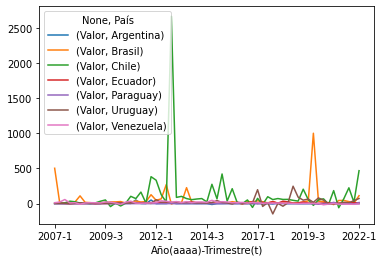

In [ ]:

##inversion media de paises latinoamericanos en colombia

mean = latam.groupby(["Año(aaaa)-Trimestre(t)"," País"]).mean().unstack().plot()
mean

**my own example 35 correlation matrix**

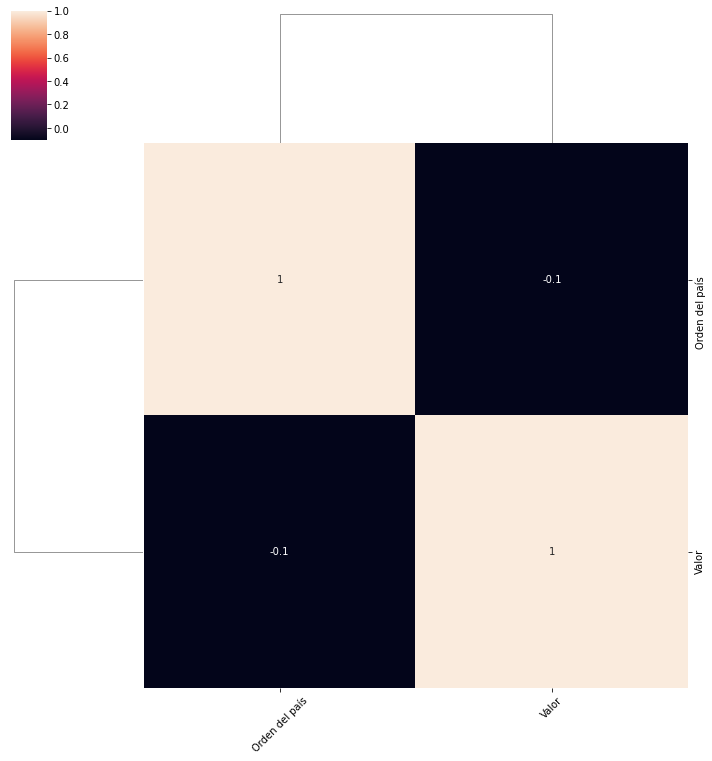

In [ ]:

import seaborn as sns
paises= ["Argentina", "Venezuela", "Uruguay", "Peru","Ecuador", "Paraguay","Chile", "Brasil"]
latam = iec[iec[" País"].isin(paises)]


newdflatam = latam[["Orden del país","Valor"]]

latamcorr= newdflatam.corr()

grid = sns.clustermap(latamcorr, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
 ##nada tiene que ver una cosa con la otra

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!